In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz # used to visualize what a tree has learned
from sklearn import metrics
from sklearn.model_selection import train_test_split

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rsv = 30

In [2]:
# Our training data and test data
X_train = pd.read_csv("/work/dataset_versions/splitted_dataset_without_missing_values/X_train.csv")
X_test = pd.read_csv("/work/dataset_versions/splitted_dataset_without_missing_values/X_test.csv")

y_train = pd.read_csv("/work/dataset_versions/splitted_dataset_without_missing_values/y_train.csv")
y_test = pd.read_csv("/work/dataset_versions/splitted_dataset_without_missing_values/y_test.csv")

##### Encoded data ###### 

X_train_enc = pd.read_csv("/work/dataset_versions/encoded_dataset/X_train_enc.csv")
X_test_enc = pd.read_csv("/work/dataset_versions/encoded_dataset/X_test_enc.csv")

y_train_enc = pd.read_csv("/work/dataset_versions/encoded_dataset/y_train_enc.csv")
y_test_enc = pd.read_csv("/work/dataset_versions/encoded_dataset/y_test_enc.csv")

le_df = pd.read_csv("/work/dataset_versions/label_encoded_data.csv")
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(le_df.drop('SalePrice', axis=1), le_df.SalePrice, test_size=0.20, random_state=rsv)

data7 = pd.read_csv("/work/dataset_versions/dataset7.csv")
X_train7, X_test7, y_train7, y_test7 = train_test_split(data7.drop('SalePrice', axis=1), data7.SalePrice, test_size=0.20, random_state=rsv)

# Example used in report

In [3]:
iris = load_iris()
X = iris.data[:,2:]
Y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

In [4]:
# fill in the function to export a decision tree
# see the docs: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

export_graphviz(decision_tree=tree_clf, out_file="tree.dot", feature_names=["petal length (cm)", "petal width (cm)"], class_names= iris.target_names, rounded=True, filled=True)

# Decision trees with our data set

## Using only numerical features within top 10 MI-score features

In [5]:
# Features does not have saleprice
features = X_train[['OverallQual','GarageArea','GrLivArea','YearBuilt','TotalBsmtSF','LotArea','GarageCars']]

X1_test = X_test[['OverallQual','GarageArea','GrLivArea','YearBuilt','TotalBsmtSF','LotArea','GarageCars']]

In [6]:
tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(features, y_train)

DecisionTreeRegressor(max_depth=10)

In [7]:
y_pred = tree_reg.predict(X1_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 25353.562508058894
Mean Squared Error: 1392728473.0165713
Root Mean Squared Error: 37319.27749858739


## Decision Tree with encoded data

In [8]:
tree_reg = DecisionTreeRegressor(max_depth=7)
tree_reg.fit(X_train_enc, y_train_enc)
y_pred = tree_reg.predict(X_test_enc) 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_enc, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_enc, y_pred))
n_sims = 100
avg = 0
for i in range(n_sims):
    y_pred = tree_reg.predict(X_test_enc)
    avg += np.sqrt(metrics.mean_squared_error(y_test_enc, y_pred))
print('Average Root Mean Squared Error in ', n_sims, 'simulations:', avg/n_sims)

Mean Absolute Error: 27339.99706833137
Mean Squared Error: 1532827284.1724157
Average Root Mean Squared Error in  100 simulations: 39151.3382168785


# Random forrest regressor with encoded data

In [9]:
# parameters: n_estimators = number of trees
rand_for_regressor = RandomForestRegressor(n_estimators=100, random_state=30)
model = rand_for_regressor.fit(X_train_enc, y_train_enc)

y2_pred = model.predict(X_test_enc)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_enc, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_enc, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_enc, y2_pred)))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
Mean Absolute Error: 16573.076952054795
Mean Squared Error: 565844472.2408962
Root Mean Squared Error: 23787.485622505297


In [10]:
rand_for_regressor = RandomForestRegressor(n_estimators=100,random_state =30)
model = rand_for_regressor.fit(X_train_enc,y_train_enc)

y2_pred = model.predict(X_test_enc)



/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [11]:
y2_pred = model.predict(X_test_enc)

In [12]:
# gets the parameters of the model
model.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [13]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


<AxesSubplot:ylabel='cols'>

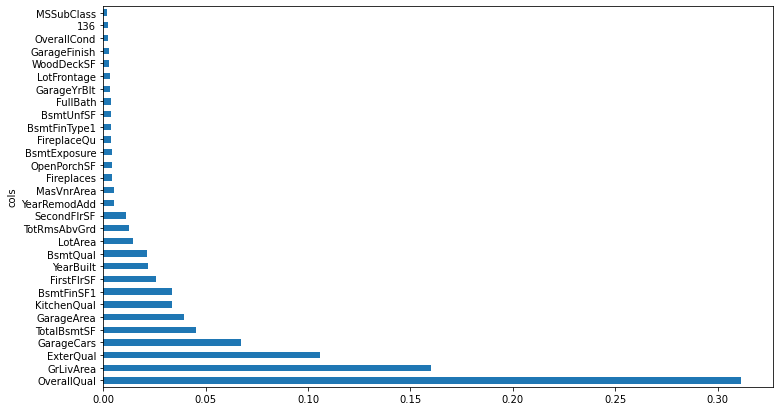

In [14]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
                          max_features=0.5, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train_enc, y_train_enc)
# rf_feat_importance wrapper from Fast.ai
fi = rf_feat_importance(m, X_train_enc)
fi[:30].plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

## Hyperparameter tuning using Grid search

The grid search, will run the randomforestregressor with several different chosen hyperparameter, and choose the scoring combination. The hyperparameters we will check for first is, n_estimators = number of trees, max_features = the number of features to consider when looking for the best split, max_depth = the depth of tree nodes and random_state = we can keep reproduce the same results from our random state.

In [15]:
import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=rsv)

## Define Grid 
param_grid = { 
    'n_estimators': [1300, 1400, 1500, 1600],
    'max_features': ['sqrt'],
    'max_depth' : [12,13,14],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [1,2],
}

## Random Search function
CV_rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, cv=5,
verbose=2, n_iter=100, n_jobs=-1)

# Run these two lines to execute the randomised search
#gs_result = CV_rfr.fit(X_train7, y_train7)
#gs_result.best_params_

In [16]:
param_grid = { 
    'n_estimators': [50,100,150,200,250,300,350,400],
    'max_features': ['sqrt','log2','auto'],
    'max_depth' : [5,6,7,8,9,10],
    'min_samples_split' : [2,10,20,30],
    'min_samples_leaf' : [1,3,5,7,9],
}

com = 1
for x in param_grid.values():
    com *= len(x)
print('There are {} combinations'.format(com))

There are 2880 combinations


In [17]:
print('This would take {:.0f} years to finish.'.format((100 * com) / (60 * 60 * 24 * 365)))

This would take 0 years to finish.


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=rsv)

## Define Grid 
param_grid = { 
    'n_estimators': [1300,1400,1500,1600],
    'max_features': ['sqrt','log2','auto'],
    'max_depth' : [10,11,12,13,14],
    'min_samples_split' : [2,3,4,5,6],
    'min_samples_leaf' : [1,2,3],
    'bootstrap' : [True, False],
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, verbose=2)
# Run these two lines to execute the grid search
#gs_result = CV_rfr.fit(X_train7, y_train7)
#gs_result.best_params_

In [19]:
best_67_features = ['OverallQual', 'Neighborhood', 'GarageArea', 'GrLivArea', 'YearBuilt',
       'TotalBsmtSF', 'LotArea', 'GarageCars', 'BsmtQual', 'KitchenQual',
       'ExterQual', 'GarageYrBlt', 'FirstFlrSF', 'YearRemodAdd', 'MSSubClass',
       'GarageFinish', 'FullBath', 'FireplaceQu', 'TotRmsAbvGrd', 'GarageType',
       'LotFrontage', 'Foundation', 'OpenPorchSF', 'Fireplaces', 'HeatingQC',
       'SecondFlrSF', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinType1',
       'Exterior1st', 'BsmtUnfSF', 'MSZoning', 'OverallCond', 'WoodDeckSF',
       'MasVnrType', 'MasVnrArea', 'SaleCondition', 'LotShape', 'HalfBath',
       'GarageCond', 'BsmtExposure', 'SaleType', 'HouseStyle', 'BedroomAbvGr',
       'GarageQual', 'CentralAir', 'BsmtCond', 'Electrical', 'PavedDrive',
       'BldgType', 'Fence', 'BsmtFinType2', 'BsmtFullBath', 'Alley',
       'LandContour', 'EnclosedPorch', 'Condition1', 'KitchenAbvGr',
       'ExterCond', 'ScreenPorch', 'Heating', 'LotConfig', 'BsmtHalfBath',
       'RoofStyle', 'Functional', 'LowQualFinSF', 'RoofMatl']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a79dfa2f-1b6b-4b40-b0ca-7dec9e2a123f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>